In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import skimage as ski

In [2]:
sysmat = np.empty((144,114,114))
with h5py.File("2d_det_3x2_fov_114x114_panelID_00" + "/"+"2d_det_3x2_fov_114x114_panelID_00.hdf5", "r") as f:
    data = f["sysmat"]
    sysmat = np.reshape(data, (144,114,114))

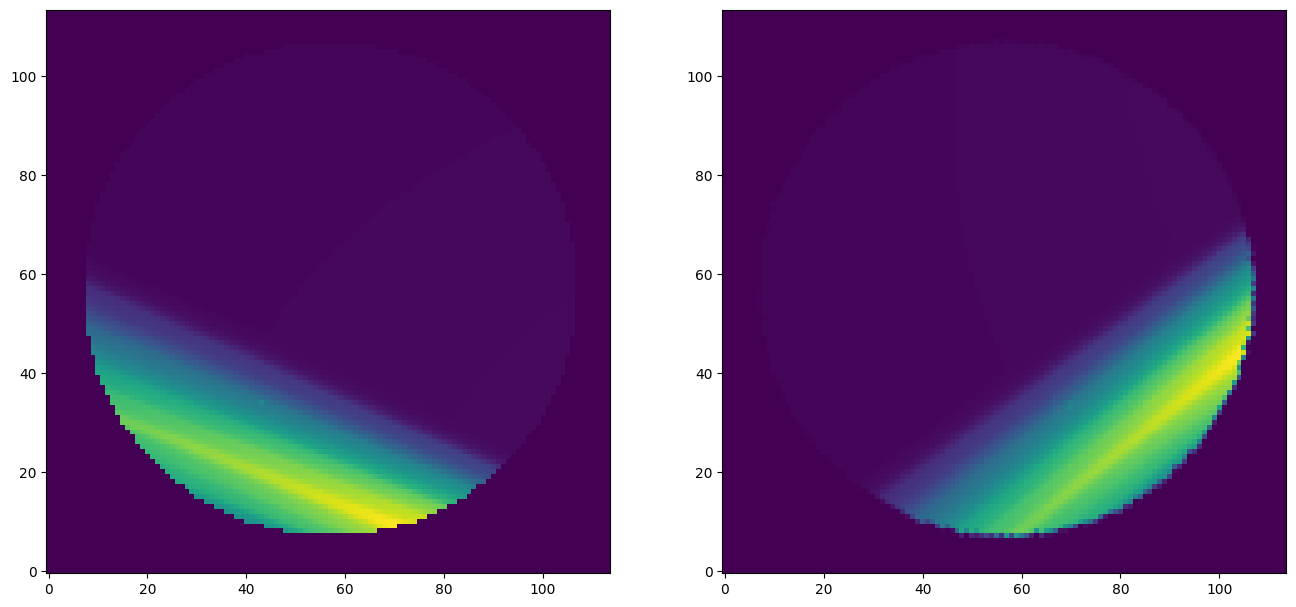

In [36]:
fig,axs = plt.subplots(1,2,figsize=(16,10))
img[disk_mask ==1] = sysmat[0][disk_mask ==1]
axs[0].imshow(img,origin="lower")
shift_y, shift_x = shape //2
tf_rotate = ski.transform.SimilarityTransform(rotation=np.pi / 3.)
tf_shift = ski.transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = ski.transform.SimilarityTransform(translation=[shift_x, shift_y])
tf_img = ski.transform.warp(img, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
axs[1].imshow(tf_img,origin="lower")

In [58]:
shape = np.array((114,114))
template = np.zeros(shape)
img=template
disk_mask = template
rr,cc = ski.draw.disk(shape//2, 50, shape=shape)
disk_mask[rr,cc]=1
tf_imgs = np.zeros((6,144,114,114))
imgs = np.zeros((144,114,114))
tf_shift = ski.transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = ski.transform.SimilarityTransform(translation=[shift_x, shift_y])
for did in range(0,144):
    imgs[did][disk_mask ==1] = sysmat[did].reshape((114,114))[disk_mask ==1]
    for aid in range(0,6):
        tf_rotate = ski.transform.SimilarityTransform(rotation=np.pi / 3.*aid)
        tf_imgs[aid,did][disk_mask ==1] = ski.transform.warp(sysmat[did].reshape(114,114), (tf_shift + (tf_rotate + tf_shift_inv)).inverse)[disk_mask ==1]

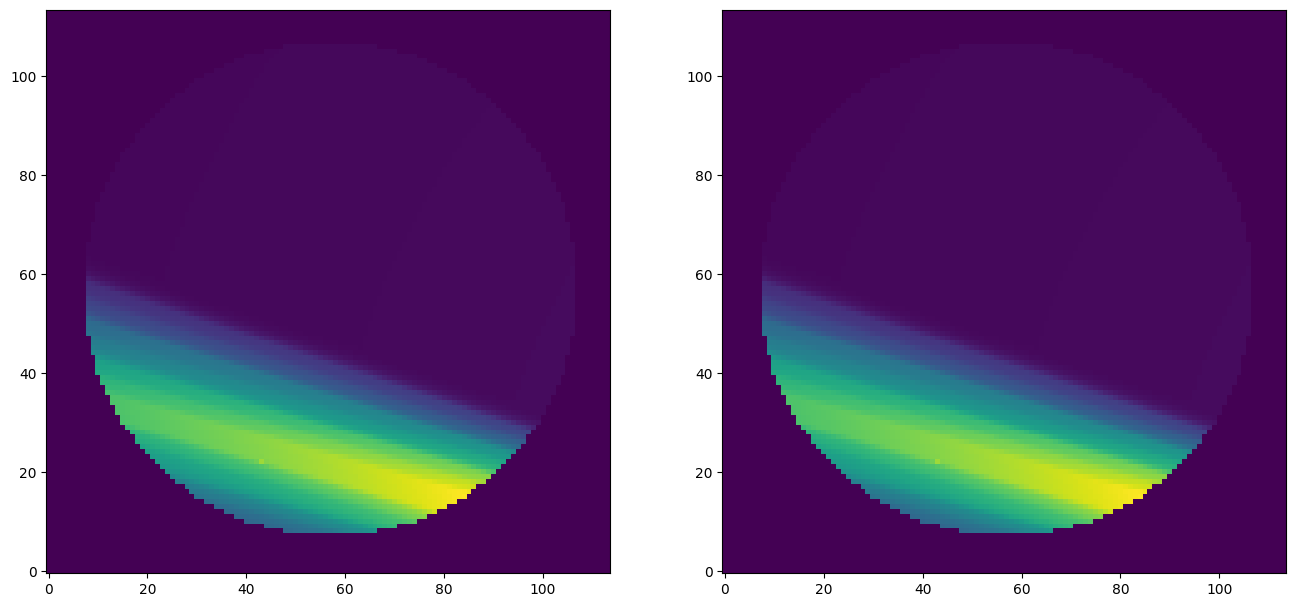

In [60]:
fig,axs = plt.subplots(1,2,figsize=(16,10))
axs[0].imshow(imgs[2],origin="lower")
axs[1].imshow(tf_imgs[0,2],origin="lower")

In [62]:
np.savez("output/"+"2d_det_3x2_fov_114x114.npz",sysmat=tf_imgs)

In [63]:
sysmat = np.empty((144,114,114))
with h5py.File("shifted_layer_3x3_114x114" + "/"+"shifted_layer_3x3_114x114.hdf5", "r") as f:
    data = f["sysmat"]
    sysmat = np.reshape(data, (144,114,114))

shape = np.array((114,114))
template = np.zeros(shape)
img=template
disk_mask = template
rr,cc = ski.draw.disk(shape//2, 50, shape=shape)
disk_mask[rr,cc]=1
tf_imgs = np.zeros((6,144,114,114))
imgs = np.zeros((144,114,114))
tf_shift = ski.transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = ski.transform.SimilarityTransform(translation=[shift_x, shift_y])
for did in range(0,144):
    imgs[did][disk_mask ==1] = sysmat[did].reshape((114,114))[disk_mask ==1]
    for aid in range(0,6):
        tf_rotate = ski.transform.SimilarityTransform(rotation=np.pi / 3.*aid)
        tf_imgs[aid,did][disk_mask ==1] = ski.transform.warp(sysmat[did].reshape(114,114), (tf_shift + (tf_rotate + tf_shift_inv)).inverse)[disk_mask ==1]
np.savez("output/"+"shifted_layer_3x3_114x114.npz",sysmat=tf_imgs)